## Table of Contents
1. [Introduction](#1--Introduction)
2. [Data Analysing](#2--Data-Analysing)
3. [Model](#3--Model)
   - [Neural Network](#3-1--Nueral-Network)
   - [Logistic Regression](#3-2-1--Logistic-Regression)
   - [Linear Regression](#3-2-2--Linear-Regression)
   - [XGBoost](#3-3--XGBoost)
   - [Decision Tree and Random Forests](#3-4--Decision-Tree-and-Random-Forests)
4. [Conclusion](#4--Conclusion)

---

<div style="text-align: center;"> <h2>Abstract</h2> <p> This notebook analyzes a heart disease dataset from Kaggle, which comprises five integrated datasets with information about 918 patients. The study begins with data exploration and visualization through pair plots, box plots, and correlation heatmaps, revealing key patterns and relationships among variables. Five machine learning models—Neural Network, Logistic Regression, XGBoost, Decision Tree, and Random Forest—are implemented to predict outcomes and evaluated using accuracy, precision, recall, and F1 scores. The Neural Network achieves the highest accuracy, while other models like Random Forest and Decision Tree provide competitive performance. A bar chart comparison of metrics across models is included for clarity. This project serves as a comprehensive example of data analysis, visualization, and predictive modeling in healthcare applications. </p> </div>

---

# 1- Introduction

This document leverages *Seaborn*, *Pandas*, *NumPy*, *Scikit-Learn*, *XGBoost*, and *TensorFlow* to conduct analytical investigations on a cardiovascular diseases dataset, aiming to evaluate the effects of various factors on disease outcomes. The dataset comprises key attributes from approximately 900 patients, including age, sex, resting blood pressure, fasting blood sugar, and other relevant variables.

Initially, four distinct *Neural Network* architectures were developed and evaluated to identify the model that best fits the dataset. The selected model was subsequently applied to the test set for validation. Additionally, *Linear Regression* and *Logistic Regression* models were trained using *Scikit-Learn*. Further analysis involved the implementation of a *Decision Tree*, a *Random Forest*, and an *XGBoost* model to ultimately determine the most effective approach for predicting cardiovascular conditions in future patients.

---

# ***2- Data Analysing***

To begin the analysis, it is crucial to import the necessary frameworks and libraries that facilitate data preprocessing, visualization, and model development. Additionally, a custom module has been designed, containing various neural network architectures to be evaluated during the modeling process. This modular approach ensures flexibility and systematic evaluation of the candidate architectures.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from neural_models import build_models
import warnings
warnings.filterwarnings('ignore')

Since the dataset is stored in CSV format, it is preferable to handle it using *Pandas*.

In [4]:
df = pd.read_csv('heart.csv')

Now it is appropriate to explore the primary features of the dataset. This step will provide insights into the structure, types, and key attributes of the data, enabling a better understanding of the variables and their potential impact on the analysis.

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.duplicated().sum()

0

In [12]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.shape

(918, 12)

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


As some columns contain non-numeric values, it is necessary to convert them into numerical representations to ensure compatibility with machine learning algorithms. This step is essential for processing categorical data and integrating it seamlessly into the analysis.

In [20]:
df['Sex'] = df['Sex'].map({'M':0, 'F':1})
df['ChestPainType'] = df['ChestPainType'].map({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3})
df['RestingECG'] = df['RestingECG'].map({'Normal':0, 'ST':1, 'LVH':2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})
df['ST_Slope'] = df['ST_Slope'].map({'Flat':0, 'Up':1, 'Down':2})

We should split our dataset into 60% for training and 20% for test and Cross-Validation to ensure the model learns patterns effectively while reserving a portion for evaluating its performance on unseen data, preventing overfitting and ensuring proper validation. I use *Scikit-Learn* for this purpose.

In [22]:
train_df, test_df = train_test_split(df, test_size = 0.4, random_state = 52)
dev_df, test_set = train_test_split(test_df, test_size = 0.5)
print(train_df.shape)
print(dev_df.shape)
print(test_set.shape)

(550, 12)
(184, 12)
(184, 12)


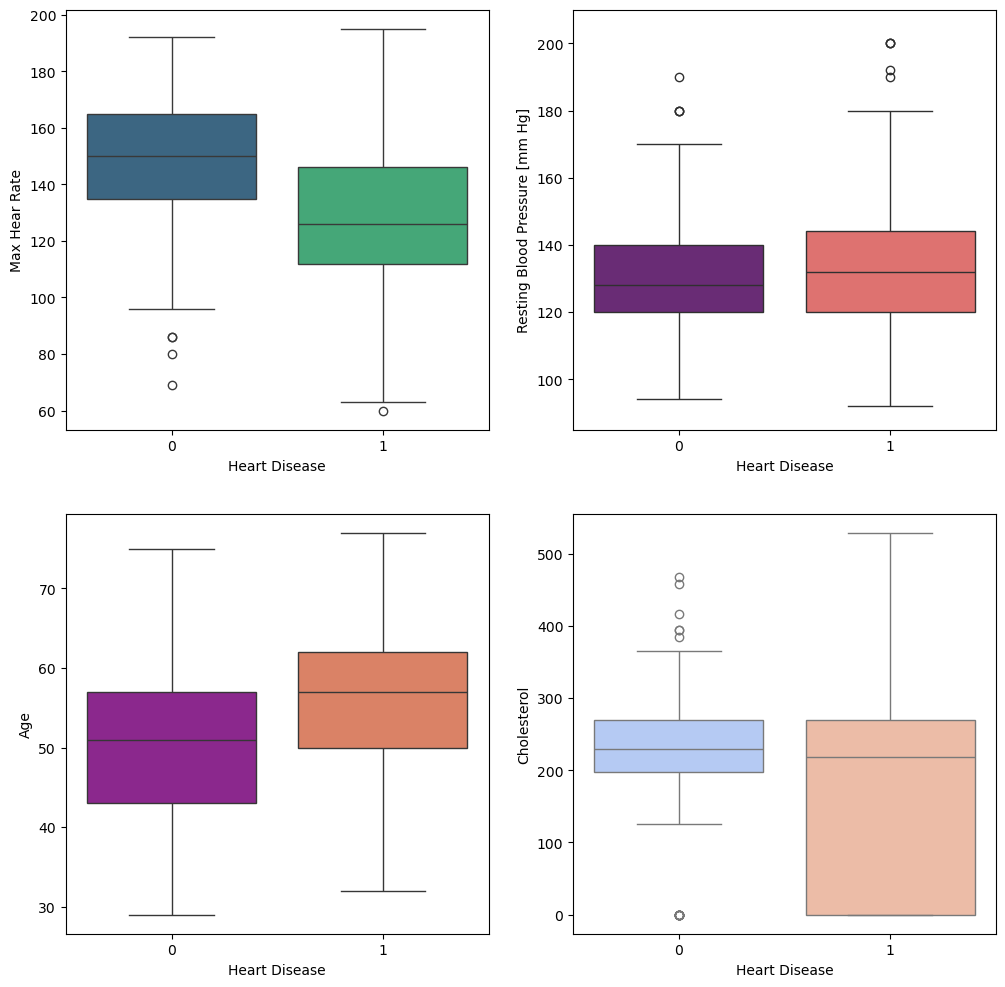

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'MaxHR', palette = 'viridis', ax = axs[0,0])
axs[0,0].set_xlabel('Heart Disease')
axs[0,0].set_ylabel('Max Hear Rate')
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'RestingBP', palette = 'magma', ax = axs[0,1])
axs[0,1].set_xlabel('Heart Disease')
axs[0,1].set_ylabel('Resting Blood Pressure [mm Hg]')
axs[0,1].set_ylim(85,)
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'Age', palette = 'plasma', ax = axs[1,0])
axs[1,0].set_xlabel('Heart Disease')
axs[1,0].set_ylabel('Age')
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'Cholesterol', palette = 'coolwarm', ax = axs[1,1])
axs[1,1].set_xlabel('Heart Disease')
axs[1,1].set_ylabel('Cholesterol')
plt.show()

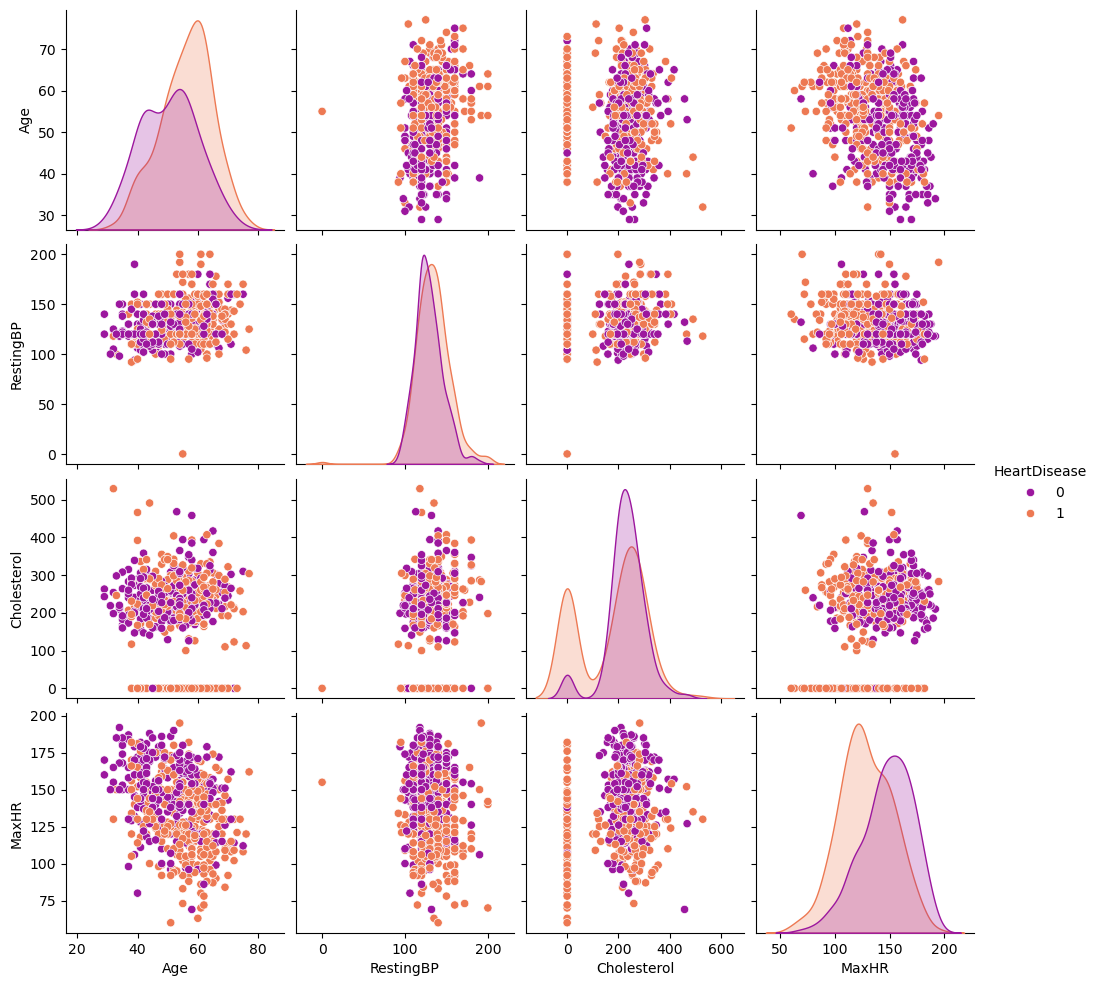

In [26]:
sns.pairplot(train_df, vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], hue = 'HeartDisease', palette = 'plasma')
plt.show()

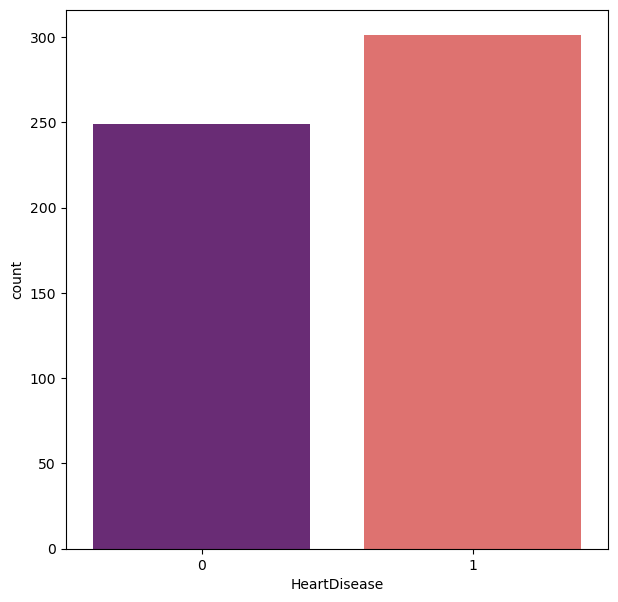

In [28]:
plt.figure(figsize = (7,7))
sns.countplot(data = train_df, x = 'HeartDisease', palette = 'magma')
plt.show()

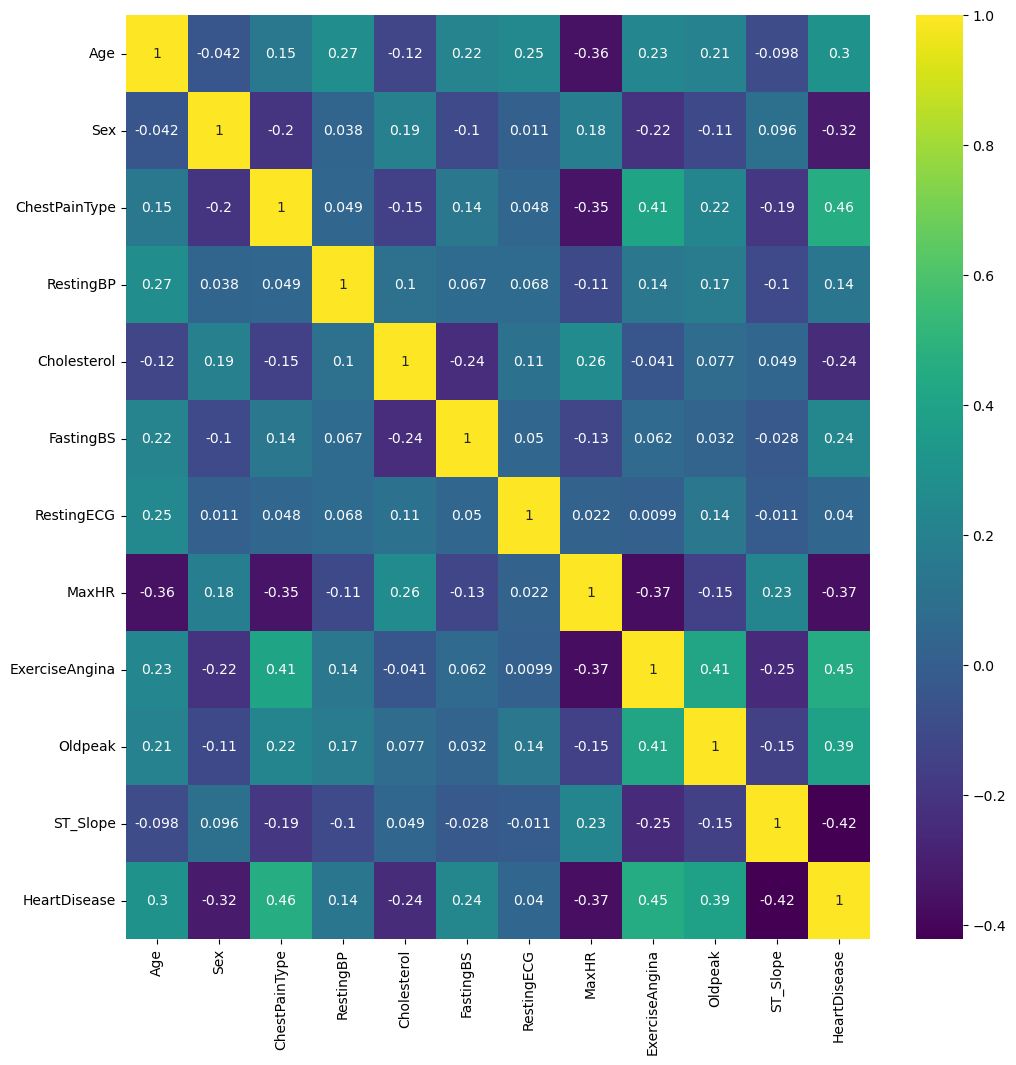

In [30]:
plt.figure(figsize = (12,12))
sns.heatmap(train_df.corr(numeric_only = True), annot = True, cmap = 'viridis')
plt.show()

---

# ***3- Model***

The next step entails developing a predictive model to estimate the likelihood of heart disease in prospective patients. This process will involve training four types of models: a *Linear Regression* model and a *Logistic Regression* model using *Scikit-Learn*, the best-performing *Neural Network* architecture, a *Decision Tree*, and a *Random Forest* with an appropriately tuned depth. Additionally, an *XGBoost* model will be trained, and a comparative analysis will be conducted to identify the most effective model for predicting heart disease outcomes.

## 3-1- Nueral Network
    
To begin, the objective is to identify the most suitable model for the task. For this purpose, four distinct *Neural Network* architectures, provided within the *neural_models* module, will be utilized. These architectures will be evaluated systematically to determine the one that best fits the dataset and yields optimal performance.

In [32]:
feature = train_df.drop('HeartDisease', axis = 1).to_numpy()
outcome = train_df['HeartDisease'].to_numpy()

feature_cv = dev_df.drop('HeartDisease', axis = 1).to_numpy()
outcome_cv = dev_df['HeartDisease'].to_numpy()

feature_test = test_set.drop('HeartDisease', axis = 1).to_numpy()
outcome_test = test_set['HeartDisease'].to_numpy()

In [34]:
norm_feature = StandardScaler()
X_train = norm_feature.fit_transform(feature)
X_cv = norm_feature.transform(feature_cv)
X_test = norm_feature.transform(feature_test)

In [36]:
nn_models = build_models()

In [38]:
nn_train_err = []
nn_cv_err = []

nn_train_accur = []
nn_cv_accur = []

for model in nn_models:
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(0.01)
    )
    print(f'Training : {model.name}')

    model.fit(
        X_train, outcome,
        epochs = 20,
        verbose = 0)
    print('DONE!')

    threshold = 0.5
    
    yhat = model.predict(X_train)
    yhat = np.where(yhat >= 0.5, 1 ,0)
    train_error = np.mean(yhat != outcome)
    nn_train_err.append(train_error)
    accuracy_train = accuracy_score(yhat, outcome)
    nn_train_accur.append(accuracy_train)
    
    yhat_cv = model.predict(X_cv)
    yhat_cv = np.where(yhat_cv >= threshold, 1, 0)
    cv_error = np.mean(yhat_cv != outcome_cv)
    nn_cv_err.append(cv_error)
    accuracy_cv = accuracy_score(yhat_cv, outcome_cv)
    nn_cv_accur.append(accuracy_cv)
    
for model_num in range(len(nn_train_err)):
    print(f'Model {model_num + 1} -> Train set accuracy: {nn_train_accur[model_num]:0.3f}' + f' & CV accuracy: {nn_cv_accur[model_num]:0.3f}')
    print('_________________________________________________________')

Training : model_1
DONE!
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training : model_2
DONE!
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training : model_3
DONE!
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training : model_4
DONE!
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Model 1 -> Train set accuracy: 0.882 & CV accuracy: 0.897
_________________________________________________________
Model 2 -> Train set accuracy: 0.915 & CV accuracy: 0.913
_________________________________________________________
Model 3 -> Train set accuracy: 0.880 & CV accuracy: 0.913
_________________________________________________________
Model 4 -> Train set accuracy: 0.900 & CV accuracy: 0.880
_________________________________________________________


Given the superior performance of the second model on both the training and cross-validation sets, this architecture has been selected for application to the test set. This decision ensures the use of the most effective model for evaluating the test data and achieving optimal predictions.

In [40]:
model = build_models()
best_model = model[1]

best_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

best_model.fit(
    X_test, outcome_test,
    epochs = 20,
    verbose = 0
)

yhat_test = best_model.predict(X_test)
yhat_test = np.where(yhat_test >= 0.5, 1, 0)
accur_test = accuracy_score(yhat_test, outcome_test)
print(f'Accuracy on test set using second model -> {accur_test * 100:0.3f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy on test set using second model -> 95.109


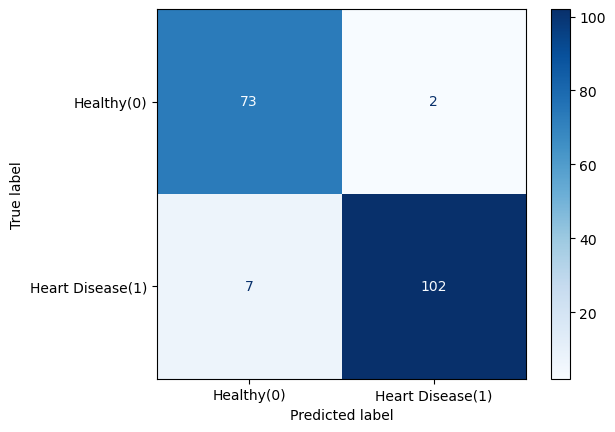

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.91      0.97      0.94        75
Heart Disease(1)       0.98      0.94      0.96       109

        accuracy                           0.95       184
       macro avg       0.95      0.95      0.95       184
    weighted avg       0.95      0.95      0.95       184



In [42]:
cm = confusion_matrix(outcome_test, yhat_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Blues)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(outcome_test, yhat_test, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

---

## ***3-2- Scikit-Learn***

### *3-2-1- Logistic Regression*

In this section, a simple *logistic regression* model is trained using *Scikit-Learn*.

In [97]:
lr_model = LogisticRegression()
lr_model.fit(X_train, outcome)

LogisticRegression()

In [99]:
yhat_lr_cv = lr_model.predict(X_cv)
yhat_lr_test = lr_model.predict(X_test)
accuracy_cv = accuracy_score(yhat_lr_cv, outcome_cv)
accuracy_test = accuracy_score(yhat_lr_test, outcome_test)
print(f'Accuracy on CV using Scikit-Learn -> {accuracy_cv * 100:0.3f}')
print(f'Accuracy on test using Scikit-Learn -> {accuracy_test * 100:0.3f}')

Accuracy on CV using Scikit-Learn -> 48.913
Accuracy on test using Scikit-Learn -> 52.717


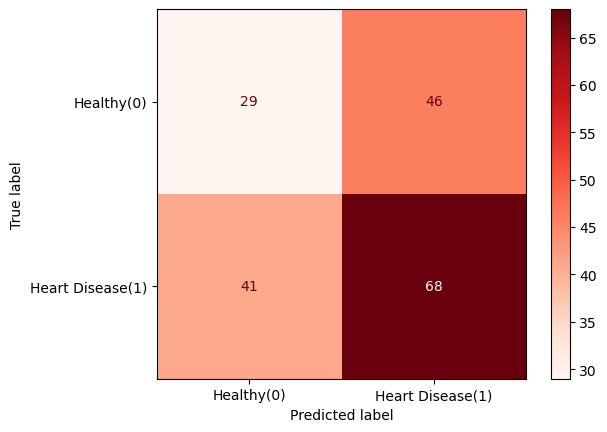

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.41      0.39      0.40        75
Heart Disease(1)       0.60      0.62      0.61       109

        accuracy                           0.53       184
       macro avg       0.51      0.51      0.50       184
    weighted avg       0.52      0.53      0.52       184



In [101]:
conf_matrix = confusion_matrix(outcome_test, yhat_lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Reds)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(outcome_test, yhat_lr_test, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

### *3-2-2- Linear Regression*

Also, the *linear regression* model is trained in this step of the process.

In [50]:
sgdr = SGDRegressor(max_iter = 100000)
sgdr.fit(X_train, outcome)

SGDRegressor(max_iter=100000)

It is now essential to evaluate the accuracy of this model as well.

In [52]:
score = sgdr.score(X_test, outcome_test)
print(f"Accuracy on test set using Linear Regression -> {score*100:0.3f}")

Accuracy on test set using Linear Regression -> 48.656


---

## ***3-3- XGBoost***

In the final phase of our study, the last model was developed utilizing *XGBoost*.

In [54]:
model = XGBClassifier()
model.fit(X_train, outcome)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
yhat_xgb_cv = model.predict(X_cv)
yhat_xgb_test = model.predict(X_test)

accuracy_cv = accuracy_score(outcome_cv, yhat_xgb_cv)
accuracy_cv = accuracy_cv * 100
accuracy_test = accuracy_score(outcome_test, yhat_xgb_test)
accuracy_test = accuracy_test * 100
print(f"Accuracy on CV set using XGBoost -> {accuracy_cv:0.3f}")
print(f"Accuracy on test set using XGBoost -> {accuracy_test:0.3f}")

Accuracy on CV set using XGBoost -> 89.674
Accuracy on test set using XGBoost -> 85.870


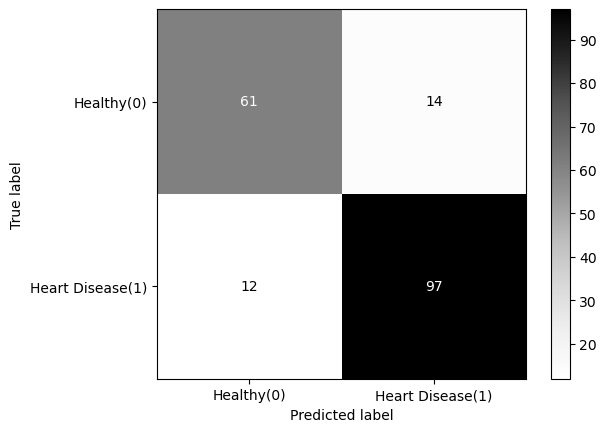

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.84      0.81      0.82        75
Heart Disease(1)       0.87      0.89      0.88       109

        accuracy                           0.86       184
       macro avg       0.85      0.85      0.85       184
    weighted avg       0.86      0.86      0.86       184



In [58]:
conf_matrix = confusion_matrix(outcome_test, yhat_xgb_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Greys)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(outcome_test, yhat_xgb_test, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

---

## ***3-4- Decision Tree and Random Forests***

To begin, it is necessary to determine the optimal values for *min_samples_split* and *max_depth* in order to train the *Decision Tree* and *Random Forest* models effectively. These parameters are critical for regulating the complexity of the models and achieving a balance between underfitting and overfitting.

The raw dataset needs to be reloaded to perform *One-Hot Encoding*.

In [60]:
data_set = pd.read_csv('Heart.csv')

In [62]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [64]:
cat_vars = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [66]:
data_set = pd.get_dummies(data = data_set,
                    prefix = cat_vars,
                    columns = cat_vars)

In [68]:
data_set.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [70]:
features = data_set.drop('HeartDisease', axis = 1)
result = data_set['HeartDisease']

In [72]:
X_train, X, y_train, Y = train_test_split(features, result, train_size = 0.6, random_state = 52)
X_test, X_cv, y_test, y_cv = train_test_split(X, Y, train_size = 0.5, random_state = 52)

In [74]:
min_sample_split_list = [2, 10, 30, 60, 100, 200, 300]
max_depth_list = [1, 2, 3, 4, 5, 7, 9, 12, 15, None]
n_estimator_list = [5, 15, 30, 60, 100, 200, 400, 600]

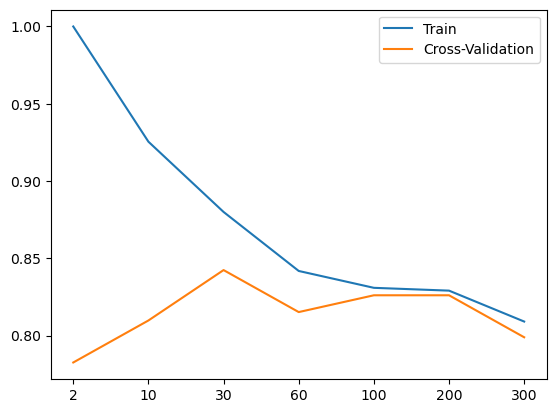

In [76]:
accuracy_train_list = []
accuracy_cv_list = []

for min_sample in min_sample_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_sample, random_state = 52).fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_cv = model.predict(X_cv)
    accuracy_train = accuracy_score(pred_train, y_train)
    accuracy_cv = accuracy_score(pred_cv, y_cv)
    accuracy_train_list.append(accuracy_train)
    accuracy_cv_list.append(accuracy_cv)

plt.plot(accuracy_train_list)
plt.plot(accuracy_cv_list)
plt.xticks(ticks = range(len(min_sample_split_list)),labels=min_sample_split_list)
plt.legend(['Train', 'Cross-Validation'])
plt.show()

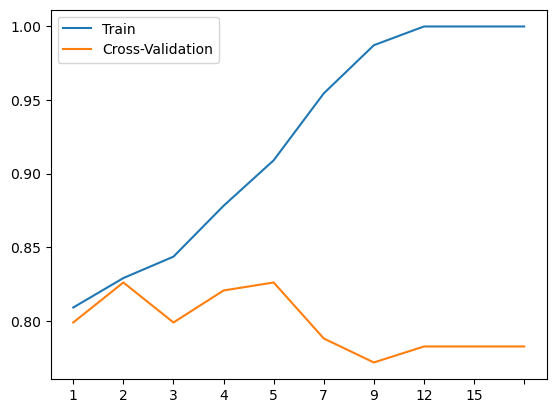

In [78]:
accuracy_train_list_dep = []
accuracy_cv_list_dep = []

for depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = depth, random_state = 52).fit(X_train, y_train)
    pred_train_dep = model.predict(X_train)
    pred_cv_dep = model.predict(X_cv)
    accuracy_train_dep = accuracy_score(pred_train_dep, y_train)
    accuracy_cv_dep = accuracy_score(pred_cv_dep, y_cv)
    accuracy_train_list_dep.append(accuracy_train_dep)
    accuracy_cv_list_dep.append(accuracy_cv_dep)

plt.plot(accuracy_train_list_dep)
plt.plot(accuracy_cv_list_dep)
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.legend(['Train', 'Cross-Validation'])
plt.show()

In [80]:
decision_model = DecisionTreeClassifier(min_samples_split = 30,
                                       max_depth = 5,
                                       random_state = 52).fit(X_test, y_test)

yhat_dec_cv = decision_model.predict(X_cv)
yhat_dec_test = decision_model.predict(X_test)

accur_dec_cv = accuracy_score(yhat_dec_cv, y_cv)
accur_dec_test = accuracy_score(yhat_dec_test, y_test)

print(f'Accuracy on CV set using Decision Tree -> {accur_dec_cv * 100:0.3f}')
print(f'Accuracy on test set using Decision Tree -> {accur_dec_test * 100:0.3f}')

Accuracy on CV set using Decision Tree -> 77.717
Accuracy on test set using Decision Tree -> 88.043


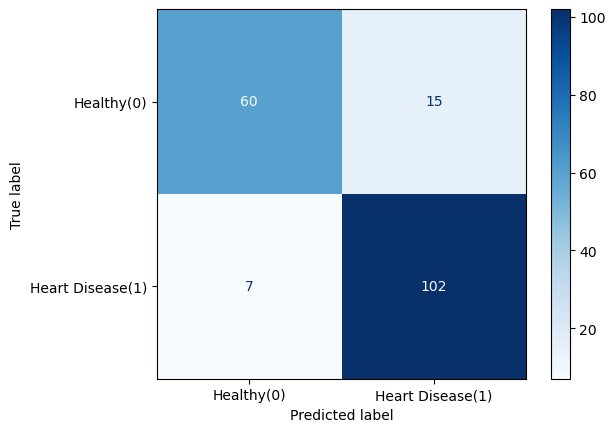

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.90      0.80      0.85        75
Heart Disease(1)       0.87      0.94      0.90       109

        accuracy                           0.88       184
       macro avg       0.88      0.87      0.87       184
    weighted avg       0.88      0.88      0.88       184



In [82]:
conf_matrix = confusion_matrix(y_test, yhat_dec_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Blues)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(y_test, yhat_dec_test, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

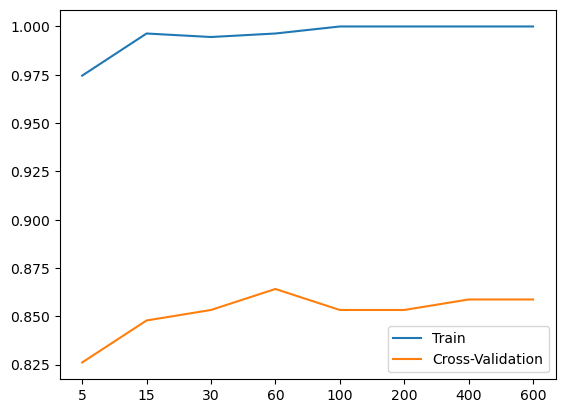

In [84]:
n_estimate_accur_train = []
n_estimate_accur_cv = []

for estimator in n_estimator_list:
    model = RandomForestClassifier(n_estimators = estimator,
                                   random_state = 52).fit(X_train, y_train)
    pred_rand_train = model.predict(X_train)
    pred_rand_cv = model.predict(X_cv)
    accuracy_train_rand = accuracy_score(pred_rand_train, y_train)
    accuracy_cv_rand = accuracy_score(pred_rand_cv, y_cv)
    n_estimate_accur_train.append(accuracy_train_rand)
    n_estimate_accur_cv.append(accuracy_cv_rand)

plt.plot(n_estimate_accur_train)
plt.plot(n_estimate_accur_cv)
plt.xticks(ticks = range(len(n_estimator_list)),labels=n_estimator_list)
plt.legend(['Train', 'Cross-Validation'])
plt.show()

In [88]:
rand_model = RandomForestClassifier(n_estimators = 60,
                                   max_depth = 5,
                                   min_samples_split = 10).fit(X_train, y_train)

yhat_random_cv = rand_model.predict(X_cv)
yhat_random_test = rand_model.predict(X_test)

accur_random_cv = accuracy_score(yhat_random_cv, y_cv)
accur_random_test = accuracy_score(yhat_random_test, y_test)

print(f'Accuracy on CV using Random Forest -> {accur_random_cv * 100:0.3f}')
print(f'Accuracy on test set using Random Forest -> {accur_random_test * 100:0.3f}')

Accuracy on CV using Random Forest -> 84.239
Accuracy on test set using Random Forest -> 89.674


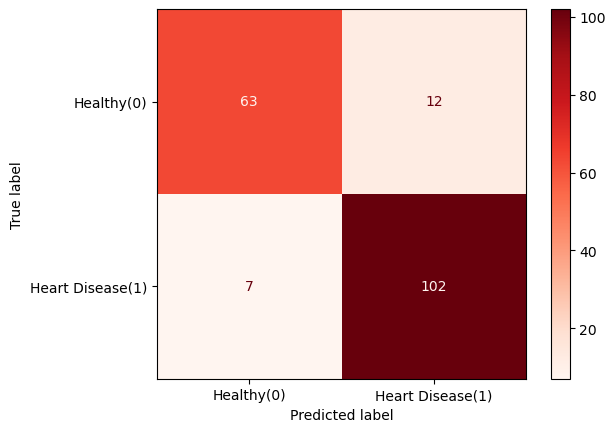

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.90      0.84      0.87        75
Heart Disease(1)       0.89      0.94      0.91       109

        accuracy                           0.90       184
       macro avg       0.90      0.89      0.89       184
    weighted avg       0.90      0.90      0.90       184



In [90]:
conf_matrix = confusion_matrix(y_test, yhat_random_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Reds)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(y_test, yhat_random_test, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

---

# ***4- Conclusion***

In the final step, evaluating and comparing the performance of each model is critical to understanding their predictive capabilities.

The findings reveal that the *Linear Regression* model, with an accuracy of approximately 48%, significantly underperformed compared to other models. This highlights the model's inadequacy in capturing the underlying patterns of the dataset, especially given its unsuitability for classification tasks.

The *Logistic Regression* model achieved an accuracy of around 84%, showcasing robust performance for simpler tasks while maintaining interpretability. Meanwhile, the *XGBoost* model, with a similar accuracy of roughly 85%, demonstrated its strength in handling structured data and its reliability as a competitive classification tool.

The *Decision Tree* and *Random Forest* models performed notably well, achieving accuracies of approximately 88% and 90%, respectively. Their performance indicates their effectiveness in capturing complex interactions in the dataset, with *Random Forest* particularly standing out due to its ability to reduce overfitting and enhance predictive performance.

Finally, the *Neural Network* achieved the highest accuracy at 95%, substantially outperforming all other models. Its ability to capture intricate relationships and patterns within the data makes it the most accurate predictor in this evaluation.

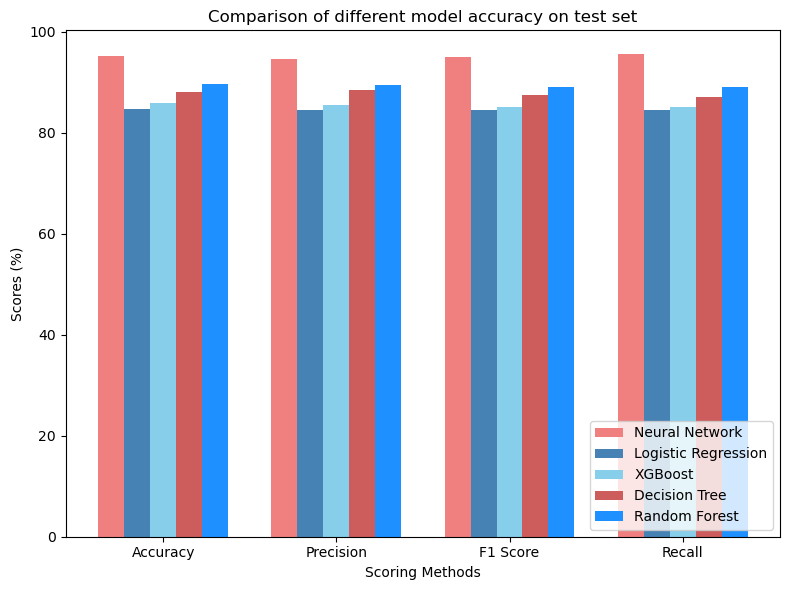

In [93]:
methods = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
neural_network = [95.109, 94.5, 95, 95.5] 
logistic_reg = [84.783, 84.5, 84.5, 84.5]
xgboost = [85.87, 85.5, 85, 85]
decision_tree = [88.043, 88.5, 87.5, 87]
random_forest = [89.674, 89.5, 89, 89]

x = np.arange(len(methods)) 
width = 0.15  # Adjusted bar width for better spacing

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - 2 * width, neural_network, width, label = 'Neural Network', color = "lightcoral")
bars2 = ax.bar(x - width, logistic_reg, width, label = 'Logistic Regression', color = "steelblue")
bars3 = ax.bar(x, xgboost, width, label = 'XGBoost', color = "skyblue")
bars4 = ax.bar(x + width, decision_tree, width, label = 'Decision Tree', color = "indianred")
bars5 = ax.bar(x + 2 * width, random_forest, width, label = 'Random Forest', color = "dodgerblue")

ax.set_xlabel('Scoring Methods')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of different model accuracy on test set')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

---

***Thanks for your attention!***

*Contact me: mhbf8@yahoo.com*